We'll be trying to predict a classification- survival or deceased.

## Import Libraries
Let's import some libraries to get started!

In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt;
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,r2_score
from xgboost import XGBClassifier
%matplotlib inline

## The Data


In [196]:
data = pd.read_csv('/content/Titanic_data.csv')

In [197]:
data.shape

(891, 13)

In [198]:
pd.set_option('display.max_rows', None)
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here is the description of the labels (columns) of the Titanic dataset:

1. **Unnamed: 0**: Automatically generated index upon data import.
2. **PassengerId**: Unique identifier for each passenger.
3. **Survived**: Survival indicator (0 = No, 1 = Yes).
4. **Pclass**: Ticket class (1 = First class, 2 = Second class, 3 = Third class).
5. **Name**: Name of the passenger.
6. **Sex**: Gender of the passenger.
7. **Age**: Age of the passenger.
8. **SibSp**: Number of siblings/spouses aboard the Titanic.
9. **Parch**: Number of parents/children aboard the Titanic.
10. **Ticket**: Ticket number.
11. **Fare**: Fare paid for the ticket.
12. **Cabin**: Cabin number.
13. **Embarked**: Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton).

In [199]:
data.columns = [
    'Index', 'ID', 'Survival Status', 'Class', 'Full Name', 'Gender',
    'Age (Years)', 'Siblings/Spouses Aboard', 'Parents/Children Aboard',
    'Ticket Number', 'Fare Paid', 'Cabin Number', 'Port of Embarkation'
]


In [200]:
data.head()

,Index,ID,Survival Status,Class,Full Name,Gender,Age (Years),Siblings/Spouses Aboard,Parents/Children Aboard,Ticket Number,Fare Paid,Cabin Number,Port of Embarkation
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [201]:
data.shape

(891, 13)

In [202]:
data.describe()

,Index,ID,Survival Status,Class,Age (Years),Siblings/Spouses Aboard,Parents/Children Aboard,Fare Paid
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,445.000000,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.500000,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,445.000000,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,667.500000,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Exploratory Data Analysis

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## Missing Data

We can use seaborn to create a simple heatmap to see where we are missing data!

<Axes: >

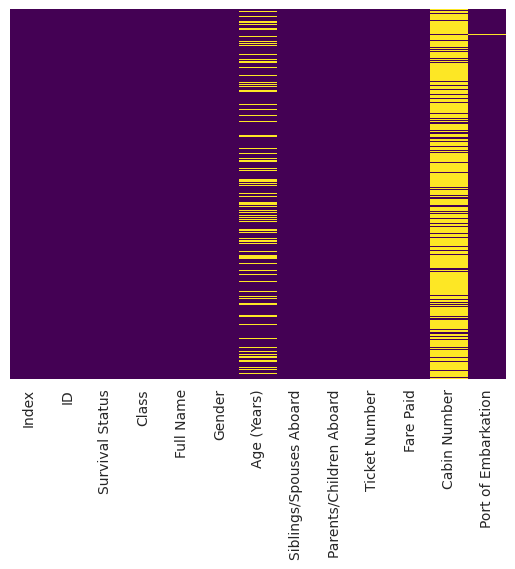

In [203]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [204]:
data.isnull().sum().sort_values(ascending=False)

Cabin Number               687
Age (Years)                177
Port of Embarkation          2
Index                        0
ID                           0
Survival Status              0
Class                        0
Full Name                    0
Gender                       0
Siblings/Spouses Aboard      0
Parents/Children Aboard      0
Ticket Number                0
Fare Paid                    0
dtype: int64

Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

<ipython-input-205-a22c7d91a9ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survival Status',data=data,palette='RdBu_r')


<Axes: xlabel='Survival Status', ylabel='count'>

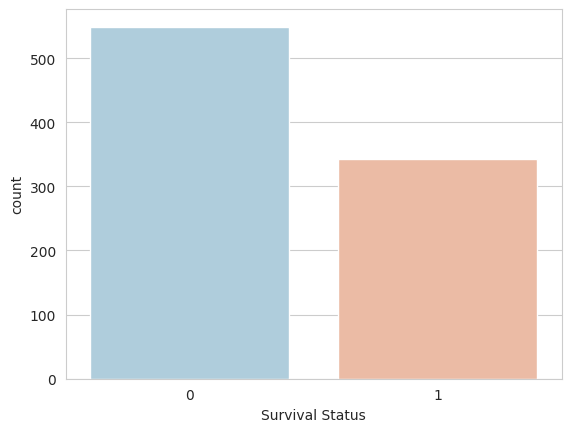

In [205]:
sns.set_style('whitegrid')
sns.countplot(x='Survival Status',data=data,palette='RdBu_r')

<Axes: xlabel='Survival Status', ylabel='count'>

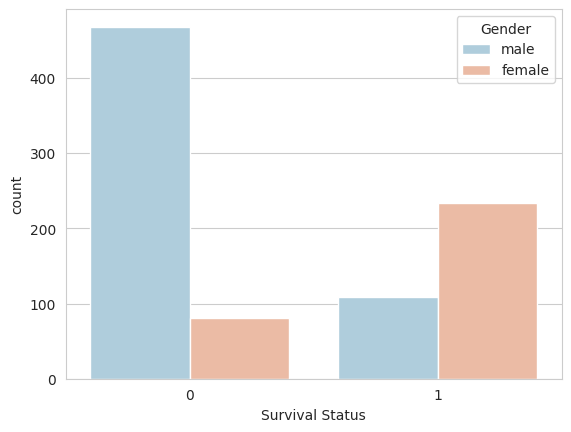

In [206]:
sns.set_style('whitegrid')
sns.countplot(x='Survival Status',hue='Gender',data=data,palette='RdBu_r')

<Axes: xlabel='Survival Status', ylabel='count'>

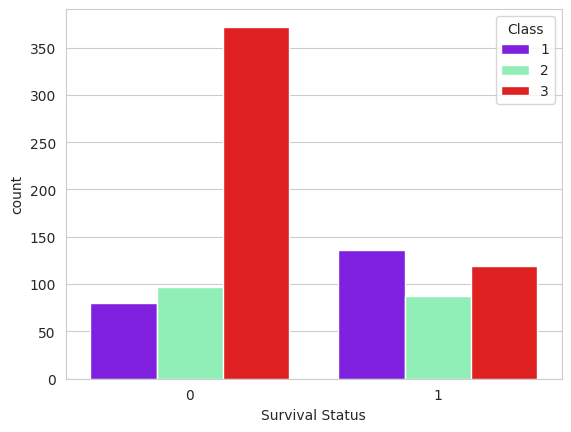

In [207]:
sns.set_style('whitegrid')
sns.countplot(x='Survival Status',hue='Class',data=data,palette='rainbow')

<Axes: >

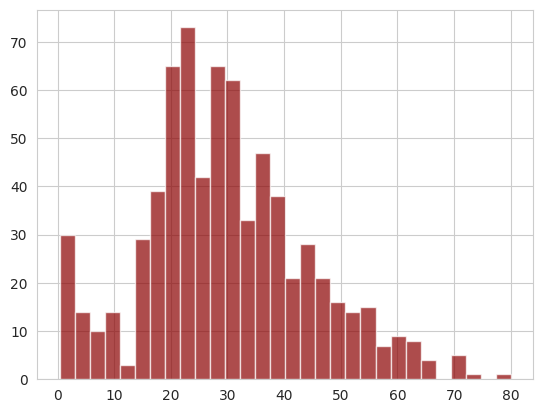

In [208]:
data['Age (Years)'].hist(bins=30,color='darkred',alpha=0.7)

<Axes: xlabel='Siblings/Spouses Aboard', ylabel='count'>

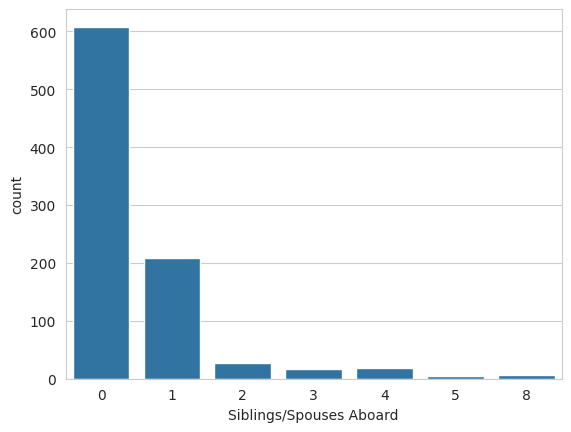

In [209]:
sns.countplot(x='Siblings/Spouses Aboard',data=data)

<Axes: xlabel='Parents/Children Aboard', ylabel='count'>

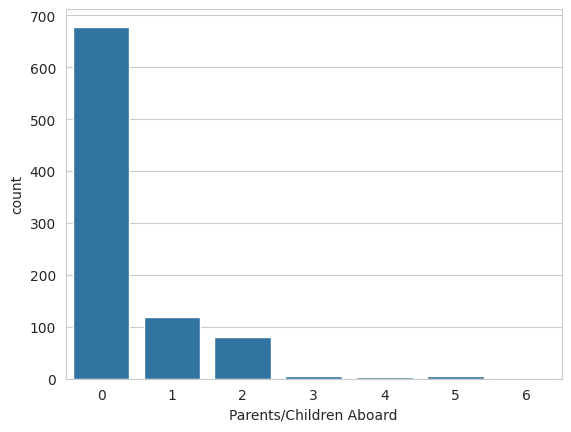

In [210]:
sns.countplot(x='Parents/Children Aboard',data=data)

<Axes: >

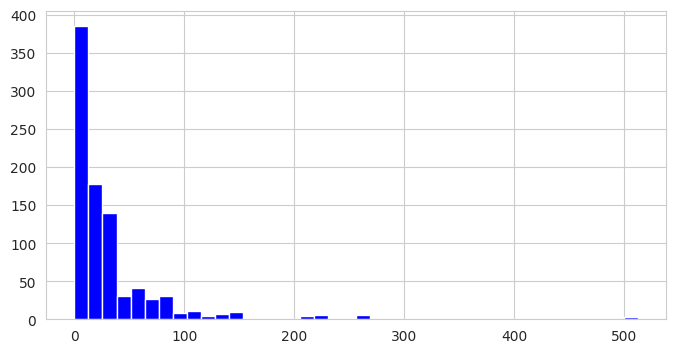

In [211]:
data['Fare Paid'].hist(color='blue',bins=40,figsize=(8,4))

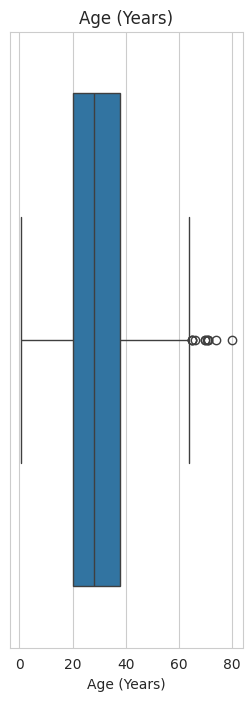

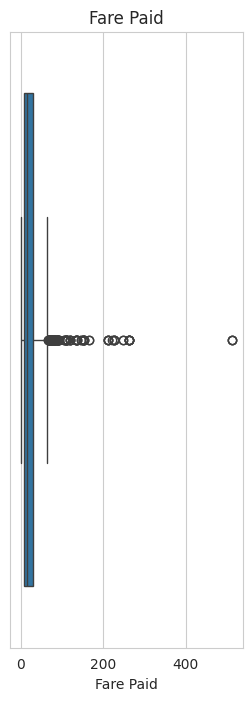

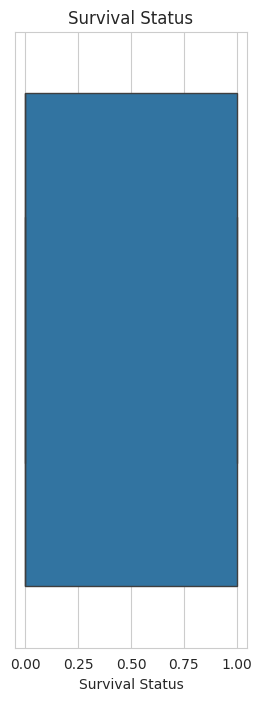

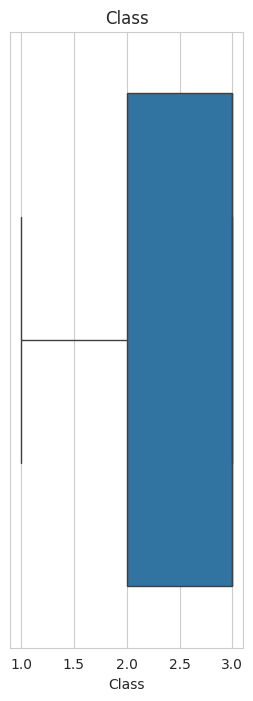

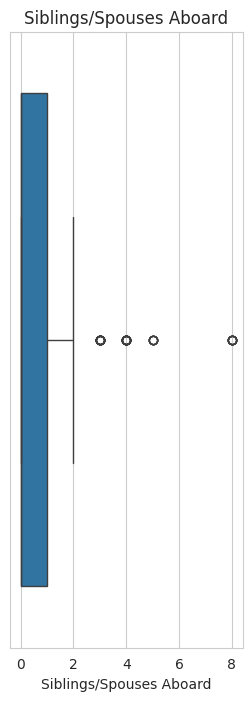

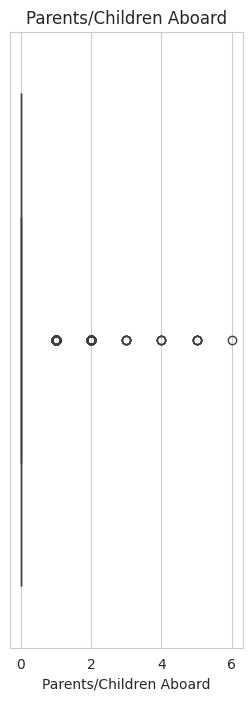

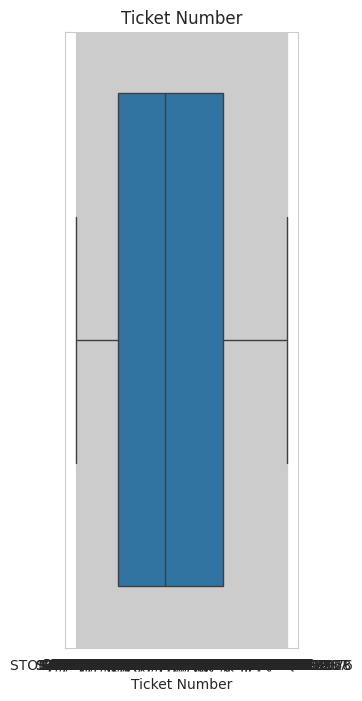

In [212]:
#Boxplots pour evaluer les outliers(valeurs aberrantes)
columns = ['Age (Years)','Fare Paid','Survival Status','Class','Siblings/Spouses Aboard','Parents/Children Aboard','Ticket Number']
for col in columns:
  fig,ax=plt.subplots(figsize=(3,8))
  sns.boxplot(x=data[col],ax=ax)
  plt.title(col)
  plt.show()

___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example:


<ipython-input-213-447c7f334fff>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class',y='Age (Years)',data=data,palette='winter')


<Axes: xlabel='Class', ylabel='Age (Years)'>

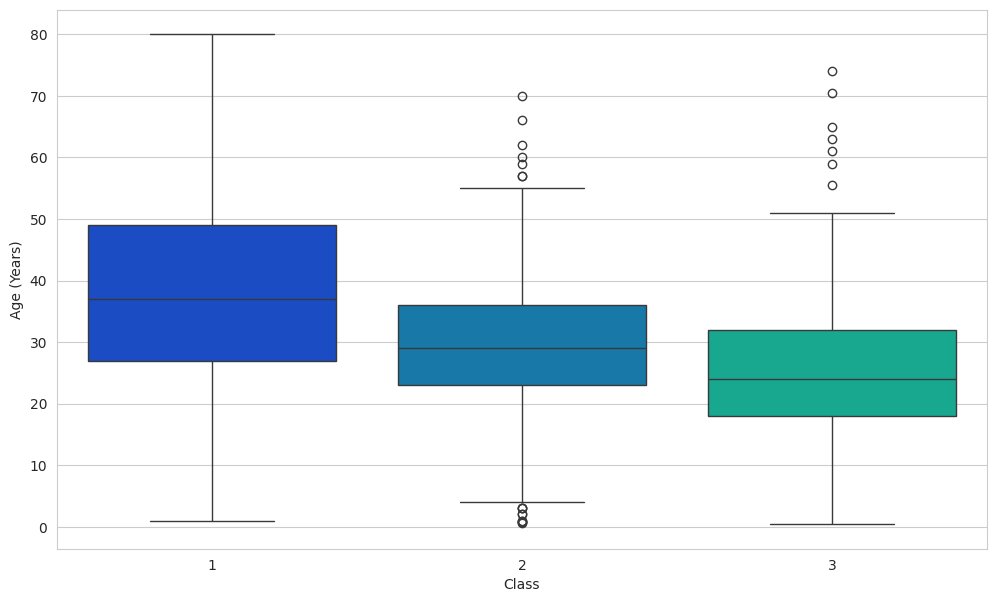

In [213]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Class',y='Age (Years)',data=data,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [214]:
# Calculate the mean age for each passenger class
mean_age_per_class = data.groupby('Class')['Age (Years)'].mean()
print(mean_age_per_class)

Class
1    38.233441
2    29.877630
3    25.140620
Name: Age (Years), dtype: float64


In [215]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 38.23

        elif Pclass == 2:
            return 29.87

        else:
            return 25.14

    else:
        return Age

Now apply that function!

In [216]:
data['Age (Years)'] = data[['Age (Years)','Class']].apply(impute_age,axis=1)
data['Port of Embarkation'] = data['Port of Embarkation'].fillna('S')

Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

We will sum of family member

In [217]:
data.drop('Cabin Number',axis=1,inplace=True)
data.drop('Ticket Number',axis=1,inplace=True)

In [218]:
data.head()

,Index,ID,Survival Status,Class,Full Name,Gender,Age (Years),Siblings/Spouses Aboard,Parents/Children Aboard,Fare Paid,Port of Embarkation
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [219]:
data.isnull().sum()

Index                      0
ID                         0
Survival Status            0
Class                      0
Full Name                  0
Gender                     0
Age (Years)                0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare Paid                  0
Port of Embarkation        0
dtype: int64

## Encoding Categorical Features
  We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [220]:
data.dtypes

Index                        int64
ID                           int64
Survival Status              int64
Class                        int64
Full Name                   object
Gender                      object
Age (Years)                float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare Paid                  float64
Port of Embarkation         object
dtype: object

In [221]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Index                    891 non-null    int64  
 1   ID                       891 non-null    int64  
 2   Survival Status          891 non-null    int64  
 3   Class                    891 non-null    int64  
 4   Full Name                891 non-null    object 
 5   Gender                   891 non-null    object 
 6   Age (Years)              891 non-null    float64
 7   Siblings/Spouses Aboard  891 non-null    int64  
 8   Parents/Children Aboard  891 non-null    int64  
 9   Fare Paid                891 non-null    float64
 10  Port of Embarkation      891 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.7+ KB


In [222]:
data['Gender']=data['Gender'].map({'male':0,'female':1})

In [223]:
data['Port of Embarkation']=data['Port of Embarkation'].map({'S':0,'C':1,'Q':2})

In [224]:
data.head()

,Index,ID,Survival Status,Class,Full Name,Gender,Age (Years),Siblings/Spouses Aboard,Parents/Children Aboard,Fare Paid,Port of Embarkation
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [225]:
data.dtypes

Index                        int64
ID                           int64
Survival Status              int64
Class                        int64
Full Name                   object
Gender                       int64
Age (Years)                float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare Paid                  float64
Port of Embarkation          int64
dtype: object

In [226]:
data.drop(['Full Name'],axis=1,inplace=True)

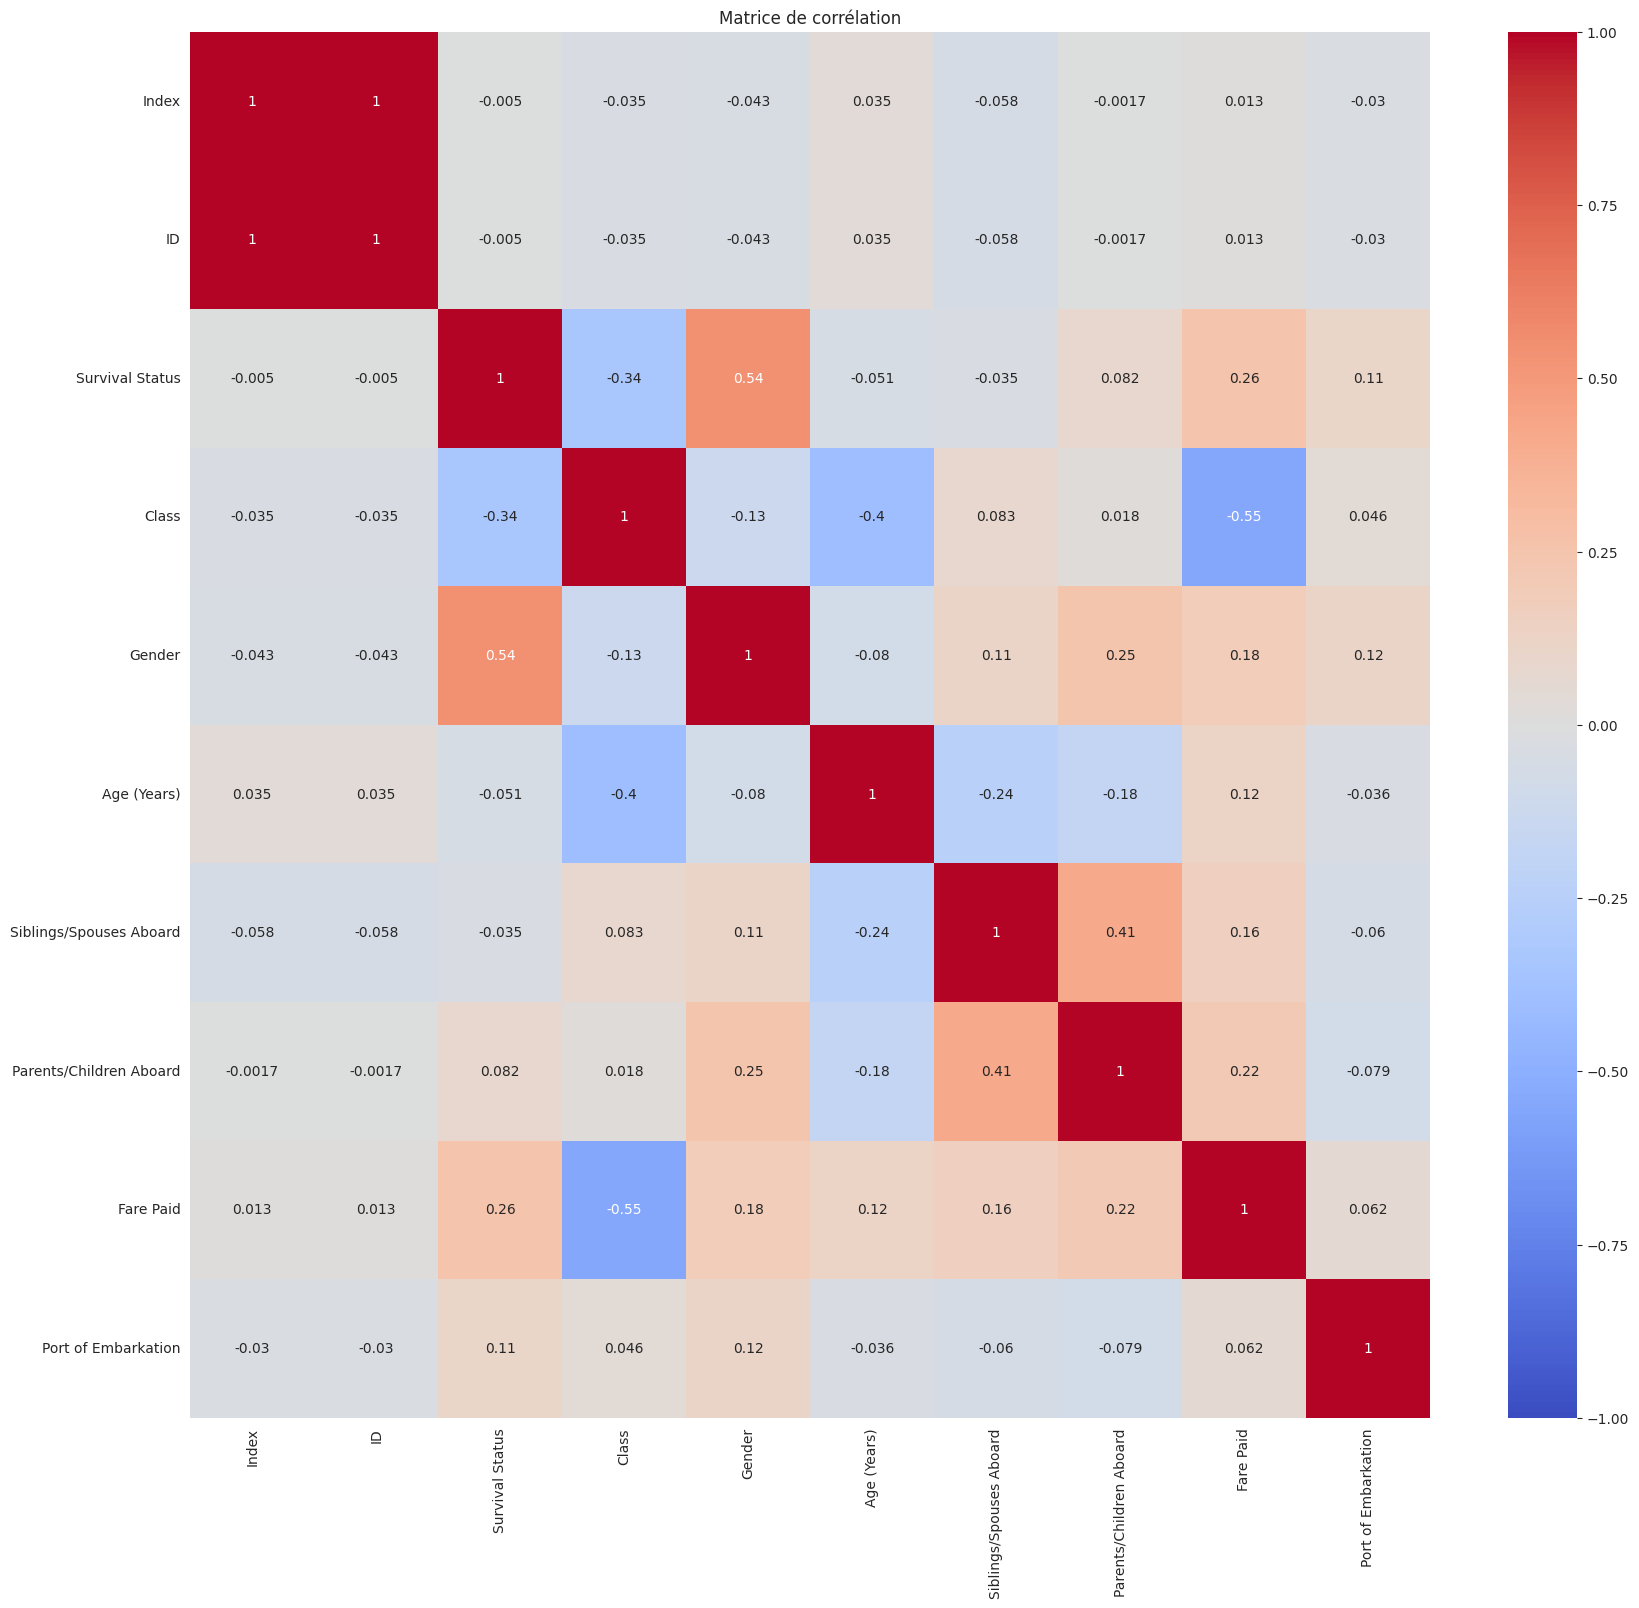

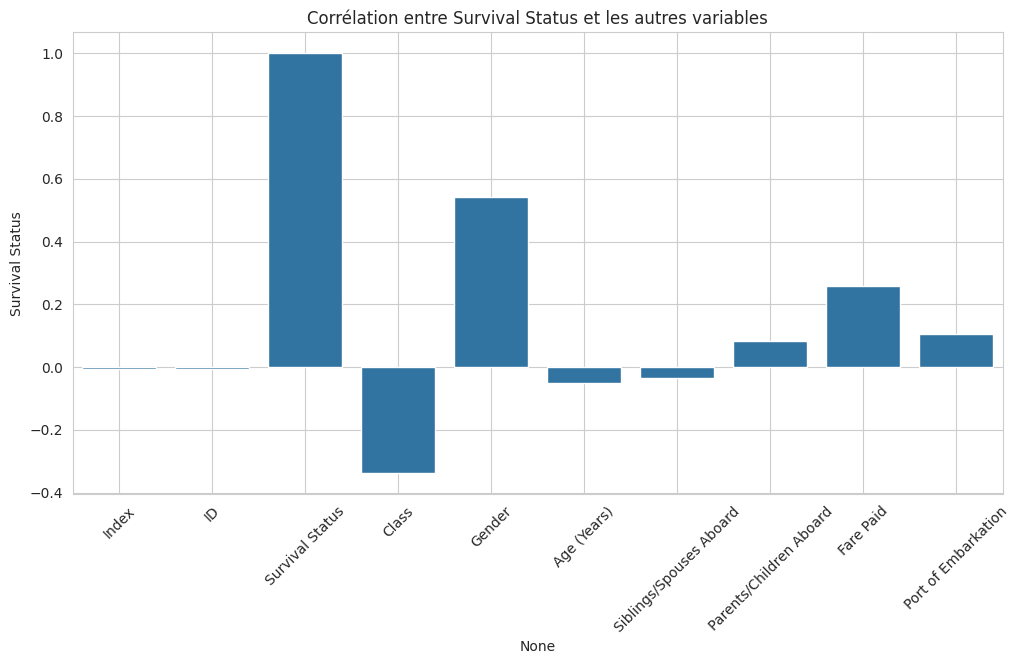

In [227]:
# Calculer la matrice de corrélation
correlation_matrix = data.corr()

# Visualisation avec heatmap (matrice de corrélation)
plt.figure(figsize=(20, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice de corrélation')
plt.show()

# Visualisation des corrélations les plus significatives avec Survival Status
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_matrix['Survival Status'].index, y=correlation_matrix['Survival Status'])
plt.title('Corrélation entre Survival Status et les autres variables')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [228]:
colo=['Age (Years)','Siblings/Spouses Aboard','Parents/Children Aboard','Index','ID']
for col in colo:
  data.drop(col,axis=1,inplace=True)

In [229]:
data.head()

,Survival Status,Class,Gender,Fare Paid,Port of Embarkation
0,0,3,0,7.2500,0
1,1,1,1,71.2833,1
2,1,3,1,7.9250,0
3,1,1,1,53.1000,0
4,0,3,0,8.0500,0


### Great! Our data is ready for our model!

## Building a Logistic Regression, Decision Tree Classifiction and Random Forest Classification models
 Let's start by splitting our data into a training set and test set.

## Train Test Split

In [230]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['Survival Status'],axis=1),
                                                    data['Survival Status'], test_size=0.10,
                                                    random_state=101)

## Training, Predicting and Evaluation

In [231]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [232]:
X_train

array([[  3.    ,   0.    ,   6.95  ,   2.    ],
       [  3.    ,   1.    ,  11.1333,   0.    ],
       [  1.    ,   1.    , 211.3375,   0.    ],
       ...,
       [  1.    ,   1.    , 134.5   ,   1.    ],
       [  1.    ,   1.    ,  57.9792,   1.    ],
       [  3.    ,   1.    ,  69.55  ,   0.    ]])

In [233]:
models={'logmodel':LogisticRegression(),
        'rf':RandomForestClassifier(n_estimators=1000),
        'dt_model':DecisionTreeClassifier(),
        'xgboost':XGBClassifier(n_estimators=1000)}

In [234]:
for name,model in models.items():
  model.fit(X_train,y_train)
  predictions = model.predict(X_test)
  print(name)
  print(classification_report(y_test,predictions))
  print(confusion_matrix(y_test,predictions))
  print(accuracy_score(y_test,predictions))
  print(r2_score(y_test,predictions))
  print(precision_score(y_test,predictions))
  print(recall_score(y_test,predictions))
  print(f1_score(y_test,predictions))
  print('\n\n')

logmodel
              precision    recall  f1-score   support

           0       0.75      0.90      0.82        51
           1       0.83      0.62      0.71        39

    accuracy                           0.78        90
   macro avg       0.79      0.76      0.76        90
weighted avg       0.79      0.78      0.77        90

[[46  5]
 [15 24]]
0.7777777777777778
0.09502262443438925
0.8275862068965517
0.6153846153846154
0.7058823529411765



rf
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        51
           1       0.81      0.67      0.73        39

    accuracy                           0.79        90
   macro avg       0.79      0.77      0.78        90
weighted avg       0.79      0.79      0.79        90

[[45  6]
 [13 26]]
0.7888888888888889
0.14027149321266974
0.8125
0.6666666666666666
0.7323943661971831



dt_model
              precision    recall  f1-score   support

           0       0.73      0.88      0.80   

The best prediction model is Random Forest.

The **Random Forest (rf)** appears to be the best model based on the following metrics:
- It has the highest overall accuracy (0.79), recall (0.79), and F1-score (0.79).
- It also shows a good balance between predictions for class 0 and class 1.

While the **logistic regression model** has slightly better precision for class 1, the **Random Forest** offers more balanced performance across both classes, which is often desirable in real-world scenarios.

In [235]:
#Saving model
Best_model = RandomForestClassifier(n_estimators=500)
Best_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500)

#Deep learning model called "ANN"

In [236]:
import keras
from keras.layers import Dense
from keras.models import Sequential

ann  = Sequential()
ann.add(Dense(units= 32,kernel_initializer= 'uniform', activation = 'relu', input_dim=4)) # Change input_dim to 4
ann.add(Dense(units= 32,kernel_initializer= 'uniform', activation = 'relu'))
ann.add(Dense(units= 1,kernel_initializer= 'uniform', activation = 'sigmoid'))
ann.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [237]:
ann.fit(X_train,y_train, batch_size=32, epochs=300,verbose= 0) # Change nb_epoch to epochs

In [238]:
ann_pred = ann.predict(X_test)
ann_pred = [ 1 if y>=0.5 else 0 for y in ann_pred]
print(ann_pred)

3/3 [==============================] - 0s 5ms/step
[0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1]


In [239]:
print(confusion_matrix(y_test,ann_pred))
print(classification_report(y_test,ann_pred))

[[48  3]
 [14 25]]
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        51
           1       0.89      0.64      0.75        39

    accuracy                           0.81        90
   macro avg       0.83      0.79      0.80        90
weighted avg       0.83      0.81      0.80        90



#Pipeline de prédiction

In [240]:
def pipeline(x):
    x = np.array(x)
    x = x.reshape(1,-1)
    y = Best_model.predict(x)
    y_1=ann.predict(x)
    y_1 = [ 'Survived' if y_1>=0.5 else 'Not Survived' for t in y_1]
    if y == 0 :
        y = 'Not Survived'
    else:
        y = 'Survived'
    return (y,"pour le model Random Forest et",y_1,"pour le model de deep learning ANN")

col = data.drop(['Survival Status'],axis=1)
Col = ['Class(1 = 1st_class, 2 = 2nd_class, 3 = 3rd_class)','Gender(0:Male,1:Female)','Fare Paid','Port of Embarkation(1 = Cherbourg, 2 = Queenstown, 0 = Southampton)']
data = col.dtypes
data = data. values
data = data.tolist()
data = [a.str for a in data]
value = []
log = []
k=0
for i in Col:
    v = input("Entrez la valeur de "+i+" : ")
    d = data[k]
    if d[1] == 'i':
        v = int(v)
    elif d[1] == 'f':
        v = float(v)
    value.append(v)
    k+=1
p= pipeline(value)
print(f'\n\n le status de survie de la personne est: {p}')

Entrez la valeur de Class(1 = 1st_class, 2 = 2nd_class, 3 = 3rd_class) : 3
Entrez la valeur de Gender(1:Male,0:Female) : 0
Entrez la valeur de Fare Paid : 245
Entrez la valeur de Port of Embarkation(0 = Cherbourg, 1 = Queenstown, 2 = Southampton) : 2
1/1 [==============================] - 0s 34ms/step


 le status de survie de la personne est: ('Not Survived', 'pour le model Random Forest et', ['Not Survived'], 'pour le model de deep learning ANN')
